## Regular Expression(정규식)
- https://www.regular-expressions.info/tutorial.html

## 1.정규식의 필요성
- 문자열에서 특정 패턴(규칙)을 갖는 부분이 있는지 확인/추출
- 기호를 사용하여 간단하고 명료하게 패턴을 표기(높은 가독성)
- 다양한 확인/추출을 위한 함수와 세부 설정을 위한 옵션 존재
- import re 사용

### 1-01. 암호 유효성 검사 
- 암호의 유효성을 검사하는 isPassword 함수를 검토하자
- 암호 유효성 검사 규칙은 다음과 같다
    - 총 길이는 10글자 이상이어야 한다
    - 1개 이상의 숫자, 영문 대문자, 영문 소문자가 포함 되어 있어야 한다
    - !@#$%^&*() 문자 중 1개 이상의 특수 문자를 포함해야 한다
    - verify()함수는 isPassword 의 결과에 따른 출력을 하는 함수로 제공됨
    

In [ ]:
# 특정 특수 문자 인지 확인하는 함수
def isspecial(ch):
    return ch in '!@#$%^&*()'

# 암호 유효성 검사 함수
def isPassword_1(pw):
    if len(pw) < 10  : return False
    check = [False] * 4
    for ch in pw:
        if ch.islower()  : check[0] = True
        if ch.isupper()  : check[1] = True
        if ch.isdecimal(): check[2] = True
        if isspecial(ch) : check[3] = True
        if all(check) : return True
    return False

In [ ]:
import re

# 암호 유효성 검사 함수
def isPassword_2(pw):
    if len(pw) < 10 : return False
    rules = ( r'[0-9]+', r'[a-z]+', r'[A-Z]+', r'[~!@#$%^&*]+')    
    for rule in rules:
        if not re.search(rule, pw) : return False
    return True

In [ ]:
comprehension / generator

In [ ]:
isPassword = isPassword_2

pwlist = ['asbdJKL12**', '123jkKL*', 'ajkdk123kjKL', 'ABC123*^5D']
maxLen = max( len(x) for x in pwlist )
def verity(pw) :
    return f'{pw:<{maxLen}} - {"Correct" if isPassword(pw) else "Wrong"}'

print('\n'.join( verity(pw) for pw in pwlist ))

asbdJKL12**  - Correct
123jkKL*     - Wrong
ajkdk123kjKL - Wrong
ABC123*^5D   - Wrong


### 1-02. 휴대폰 번호 유효성 검사
- 휴대폰 번호 여부를 확인하는 isPhoneNumber 함수 검토
- 휴대폰 번호에 사용되는 규칙
    - 3개의 그룹의 숫자로 되어 있으며 그룹은 ‘-’로 구분
    - 첫 번째 그룹은 3글자이며, [010, 011, 012, 016, 017, 018, 019] 중 하나를 사용함
    - 두 번째 그룹은 3글자 또는 4글자로 되어 있음
    - 세 번째 그룹은 4글자로 되어 있음
    - verify()함수는 isPhoneNumber의 결과에 따른 출력을 하는 함수로 제공됨


In [ ]:
pno = [1, 1, 1, 0, 0, 0, 1, 1, 1, 1]
def isPhoneNumber_T1(num):  
    if len(num)<12 or len(num)>13 : return False
    grp = num.split('-')
    if (len(grp) != 3) : return False
    if len(grp[0]) != 3 or grp[0].isdecimal() == False : return False
    if grp[0][0:2] != '01' : return False
    if not pno[int(grp[0][2])] : return False
    if len(grp[1]) < 3 or len(grp[1])>4 or grp[1].isdecimal() == False : return False
    if len(grp[2]) != 4 or not grp[2].isdecimal() : return False
    return True

In [ ]:
import re

def isPhoneNumber_T2(num):
    if re.search(r'^01[0-26-9]-[0-9]{3,4}-[0-9]{4}$', num) :
        return True
    return False

In [ ]:
isPhoneNumber = isPhoneNumber_T2
phone_numbers = ['010-456-7892',
                 '010-2345-1234',
                 '013-123-1231',
                 '012 1234 1234',
                 '016-12-1234',
                 'TEL: 012-123-1234',
                 '017-123-1234!']
maxLen = max( len(x) for x in phone_numbers )                 
def verity(pn) :
    return  f'{pn:<{maxLen}} - {"Correct" if isPhoneNumber(pn) else "Wrong"}'   

answers = [ verity(pn) for pn in phone_numbers]
print('\n'.join(answers))

010-456-7892      - Correct
010-2345-1234     - Correct
013-123-1231      - Wrong
012 1234 1234     - Wrong
016-12-1234       - Wrong
TEL: 012-123-1234 - Wrong
017-123-1234!     - Wrong


### 1-03. 문자열에서 휴대폰 번호 검색
- 문자열에서 휴대폰 번호를 검색 및 출력하는 코드 확인
- 문자열은 문자와 숫자가 함께 사용되며, 여러 휴대폰 번호 포함 가능
   - msg = 'julie 010-123-1234 peter 011-1234-1234 office 031-123-1234'
- 휴대폰 번호에 사용되는 규칙
    - 3개의 그룹의 숫자로 되어 있으며 그룹은 ‘-’로 구분
    - 첫 번째 그룹은 3글자이며, [010, 011, 012, 016, 017, 018, 019] 중 하나를 사용함
    - 두 번째 그룹은 3글자 또는 4글자로 되어 있음
    - 세 번째 그룹은 4글자로 되어 있음   

In [ ]:
# re를 사용하지 않은 프로그램

msg = 'julie 010-123-1234 peter 011-1234-1234 office 031-123-1234'
pno = [1, 1, 1, 0, 0, 0, 1, 1, 1, 1]

def isPhoneNumber(num):  
    if len(num)<12 or len(num)>13 : return False
    grp = num.split('-')
    if (len(grp) != 3) : return False
    if len(grp[0]) != 3 or grp[0].isdecimal() == False : return False
    if grp[0][0:2] != '01' : return False
    if not pno[int(grp[0][2])] : return False
    if len(grp[1]) < 3 or len(grp[1])>4 or grp[1].isdecimal() == False : return False
    if len(grp[2]) != 4 or not grp[2].isdecimal() : return False
    return True

idx = 0
for i in range(len(msg)-12):
    phone12 = msg[i:i+12]
    phone13 = msg[i:i+13]
    phone = None
    if isPhoneNumber(phone12) : phone = phone12
    elif isPhoneNumber(phone13) : phone = phone13
    if phone :
        idx += 1
        print(f'Phone number{idx} : {phone}')
         

Phone number1 : 010-123-1234
Phone number2 : 011-1234-1234


In [ ]:
# re를 사용한 프로그램
import re

msg = 'julie 010-123-1234 peter 011-1234-1234 office 031-123-1234'

r = re.finditer(r'01[0-26-9]-[0-9]{3,4}-[0-9]{4}', msg)
for idx, m in enumerate(r, start=1):
    print(f'Phone number{idx} : {m.group()}')

Phone number1 : 010-123-1234
Phone number2 : 011-1234-1234


## 2.정규식 패턴 작성

### 2-01. 정규식의 이해
- 문자집합의 패턴이 일치하는지 검사하기 위해 사용하는 표현식
- re 모듈을 import 하여야 사용할 수 있음
 
  ```import re```
- 작업의 패턴 표현
   - 처리 하고자 하는 작업을 패턴으로 표현하는 방법
   - 핸드폰 번호 검색 : '-'로 구분된 3-(3|4)-4개의 숫자
   - 성이 yoon 인 사람 : yoon으로 시작하는 문자열

- 정규식 사용의 장점
  - 작업을 패턴으로 표현하면 직관적인 표현이 됨
  - 검색 대상이 큰 경우 보다 빠른 결과를 얻을 수 있음
  - 코드의 작성 길이가 짧아짐
  
   

### 2-02. 정규식 사용법

In [ ]:
print('\\nabc')

\nabc


In [ ]:
print(r'\nabc')

\nabc


In [ ]:
import re

pattern = re.compile(r'abc')  # raw string   패턴문자열 -> Pattern 객체
mc1 = re.search(pattern, '123abcd')  # re.search -> Match객체
print(type(pattern), type(mc1))

<class '_sre.SRE_Pattern'> <class '_sre.SRE_Match'>


In [ ]:
import re

pattern = re.compile(r'abc')  # raw string   패턴문자열 -> Pattern 객체

mc1 = re.search(pattern, '123abcd')  # re.search -> Match객체
mc2 = re.search(r'abc', '123abcd')
mc3 = pattern.search('123abcd')

for mc in mc1, mc2, mc3:
    print(f'{mc.start()}~{mc.end()}에 {mc.group()}존재') 


3~6에 abc존재
3~6에 abc존재
3~6에 abc존재


### 2-03. character class
- character class : [ ] 내부에 문자를 나열한 것 
   - 나열된 문자 중 한 개 문자의 사용을 의미함
- 종류
   - [abc] : abc 중 한 개 문자
   - [a-z] : a에서 z까지 범위의 문자 중 한 개 문자
   - [a-zA-Z] : 알파벳 소문자, 대문자 모두 중 한 개 문자
   - [^0-9] : ^를 사용하면 not의 의미임, 숫자를 제외한 모든 문자에서 한 개 문자

In [ ]:
[0-9]  '1' '2'

In [ ]:
import re
# 첫 번째 글자 숫자, 두 번째 글자 a/b/c 중 한 글자, 세 번째 글자 c ~ z 사이 글자가 아닌 글자
mc = re.search(r'[0-9][abc][^c-z]', '123abcd')
if mc :
    print(f'{mc.start()}~{mc.end()}에 {mc.group()}존재') 
else:
    print('문자열에 패턴이 존재하지 않음')

2~5에 3ab존재


### 2-04. 횟수 관련 메타 문자
- 메타 문자 : 특별한 용도로 사용되는 문자를 의미함
- x* : x를 0개 이상 사용
- x+ : x를 1개 이상 사용
- x? : x를 0 또는 1개 사용
- x{n} : x를 n개 사용
- x{n, k} : x를 n개 이상, k개 이하 사용

In [ ]:
import re

def printMatch(pstr, data):
    print(pstr)
    for x in data :
        mc = re.search(pstr, x)
        maxLen = max(len(x) for x in data)
        if mc :
            print(f'{x:{maxLen}} : {mc.start()}~{mc.end()}에 {mc.group()}존재') 
        else:
            print(f'{x:{maxLen}} : 문자열에 {pstr}패턴이 존재하지 않음')

In [ ]:
# 숫자가 0회 이상 사용된 패턴 찾기 (Greedy)
dataList = ('', '1', '12', '1234', 'abc', '1a')
printMatch(r'[0-9]*', dataList)

[0-9]*
     : 0~0에 존재
1    : 0~1에 1존재
12   : 0~2에 12존재
1234 : 0~4에 1234존재
abc  : 0~0에 존재
1a   : 0~1에 1존재


In [ ]:
# 알파벳 소문자가 1회 이상 사용된 패턴 찾기 (Greedy)
dataList = ('c', 'ab', 'abcd', 'a12', '123', 'ABC')
printMatch(r'[a-z]+', dataList)

[a-z]+
c    : 0~1에 c존재
ab   : 0~2에 ab존재
abcd : 0~4에 abcd존재
a12  : 0~1에 a존재
123  : 문자열에 [a-z]+패턴이 존재하지 않음
ABC  : 문자열에 [a-z]+패턴이 존재하지 않음


In [ ]:
# 알파벳 대문자가 없거나 1회 사용된 패턴 찾기
dataList = ('', 'F', 'AB', '1C2', '123')
printMatch(r'[A-Z]?', dataList)

[A-Z]?
    : 0~0에 존재
F   : 0~1에 F존재
AB  : 0~1에 A존재
1C2 : 0~0에 존재
123 : 0~0에 존재


In [ ]:
# 숫자가 3회 연속 사용된 패턴 찾기
dataList = ('123', '12345', '12', 'ab1234de')
printMatch(r'[0-9]{3}', dataList)

[0-9]{3}
123      : 0~3에 123존재
12345    : 0~3에 123존재
12       : 문자열에 [0-9]{3}패턴이 존재하지 않음
ab1234de : 2~5에 123존재


In [ ]:
# 숫자가 2회 ~ 4회 연속 사용된 패턴 찾기
dataList = ('1', '12', '123', '1234', '12345')
printMatch(r'[0-9]{2,4}', dataList)

[0-9]{2,4}
1     : 문자열에 [0-9]{2,4}패턴이 존재하지 않음
12    : 0~2에 12존재
123   : 0~3에 123존재
1234  : 0~4에 1234존재
12345 : 0~4에 1234존재


In [ ]:
# 숫자가 3회 이상 연속 사용된 패턴 찾기
dataList = ('12', '123', '1234', '12345', 'abc1234ef')
printMatch(r'[0-9]{3,}', dataList)

[0-9]{3,}
12        : 문자열에 [0-9]{3,}패턴이 존재하지 않음
123       : 0~3에 123존재
1234      : 0~4에 1234존재
12345     : 0~5에 12345존재
abc1234ef : 3~7에 1234존재


In [ ]:
# 숫자가 3회 이하 연속 사용된 패턴 찾기 (0개 포함)
dataList = ('abc', '1', '12', '123', '1234', '12345')
printMatch(r'[0-9]{,3}', dataList)

[0-9]{,3}
abc   : 0~0에 존재
1     : 0~1에 1존재
12    : 0~2에 12존재
123   : 0~3에 123존재
1234  : 0~3에 123존재
12345 : 0~3에 123존재


### 2-05. 여러 가지 메타 문자
- . : 문자 한 개 (\n은 제외)
- ^x : 문자열의 시작이 x
- x$ : 문자열의 끝이 x
- x | y : x, y 중 하나 (여러 번 나열 가능)
   - x | y | z (x, y, z 중 하나)

In [ ]:
# a로 시작하고 o로 끝나는데 사이에 2개의 문자가 있는 패턴 검색
dataList = ('a12o', 'abco', 'aBo', 'a123o')
printMatch(r'a..o', dataList )

a..o
a12o  : 0~4에 a12o존재
abco  : 0~4에 abco존재
aBo   : 문자열에 a..o패턴이 존재하지 않음
a123o : 문자열에 a..o패턴이 존재하지 않음


In [ ]:
# \n이 포함된 패턴을 검색하고 싶다면?
ret = re.search('.abc', '\nabc', re.S)
print('result of search .abc :', ret)
display(ret.group())

result of search .abc : <_sre.SRE_Match object; span=(0, 4), match='\nabc'>


'\nabc'

In [ ]:
# 1개 이상의 알파벳 소문자로 시작되는 패턴에서 '알파벳 소문자' 검색
dataList = ('a12', 'kbs', '123a', 'KBstar')
printMatch(r'^[a-z]+', dataList)

^[a-z]+
a12    : 0~1에 a존재
kbs    : 0~3에 kbs존재
123a   : 문자열에 ^[a-z]+패턴이 존재하지 않음
KBstar : 문자열에 ^[a-z]+패턴이 존재하지 않음


In [ ]:
# 1개 이상의 숫자로 끝나는 패턴에서 '숫자' 검색
dataList = ('ab123', 'UP3', 'a12b')
printMatch(r'[0-9]+$', dataList)

[0-9]+$
ab123 : 2~5에 123존재
UP3   : 2~3에 3존재
a12b  : 문자열에 [0-9]+$패턴이 존재하지 않음


In [ ]:
# abc 또는 123 패턴 찾기
dataList = ('abcdef', '-1234-', '12431', 'axybz')
printMatch(r'abc|123', dataList)  # | => or

abc|123
abcdef : 0~3에 abc존재
-1234- : 1~4에 123존재
12431  : 문자열에 abc|123패턴이 존재하지 않음
axybz  : 문자열에 abc|123패턴이 존재하지 않음


### 2-06. 그룹 관련 메타 문자
- ( x ) : ( ) 안의 내용을 그룹화 하고 내용이 캡처됨, 그룹 번호 1번부터 부여
- \1...\99 : 캡쳐 된 그룹 1번 ~ 99번 사용
- (?:x) : 그룹으로 인정되지만, 캡처 및 그룹번호 부여되지 않음
- ```(?P<name>x)``` : ( ) 안의 내용을 그룹화하고 내용을 캡쳐함.  그룹의 이름을 지정
   - 사용시 'name'으로 사용 (예) match.group('name')
   - 그룹 번호로도 사용할 수 있음 (위치에 따른 번호)
- 캡처 : 저장되는 것을 의미하며, 후에 그룹번호를 사용해 꺼내 사용 가능함
- 다른 메타 문자 종류는 ```re.__doc__``` 를 사용하도록 한다


In [ ]:
import re
# 1. 숫자 그룹 => 숫자 3글자
# 2. 구분 기호 그룹 => : 또는 - 또는 공백 문자가 있을 수 있으며, 그룹 지정
# 3. 그룹번호 부여하지 않는 숫자 그룹 => 숫자 3글자 또는 4글자 
# 4. 2번에서 사용된 구분 기호 => 첫 번째 구분 기호와 동일한 것을 사용함
# 5. 이름을 pnum으로 갖는 숫자 그룹 => 숫자 4글자
pattern = re.compile(r'([0-9]{3})(:|-| )(?:[0-9]{3,4})\2(?P<pnum>[0-9]{4})')    # '010'   '-'
mc = re.search(pattern, '010-123-4567')
if mc :
    print('{}~{}에 {}존재'.format(mc.start(), mc.end(), mc.group()))
    for x in mc.groups():
        print(x)
    print(mc.group(3), mc.group('pnum'))
else:
    print('문자열에 패턴이 존재하지 않음')

0~12에 010-123-4567존재
010
-
4567
4567 4567


In [ ]:
print(re.__doc__)

Support for regular expressions (RE).

This module provides regular expression matching operations similar to
those found in Perl.  It supports both 8-bit and Unicode strings; both
the pattern and the strings being processed can contain null bytes and
characters outside the US ASCII range.

Regular expressions can contain both special and ordinary characters.
Most ordinary characters, like "A", "a", or "0", are the simplest
regular expressions; they simply match themselves.  You can
concatenate ordinary characters, so last matches the string 'last'.

The special characters are:
    "."      Matches any character except a newline.
    "^"      Matches the start of the string.
    "$"      Matches the end of the string or just before the newline at
             the end of the string.
    "*"      Matches 0 or more (greedy) repetitions of the preceding RE.
             Greedy means that it will match as many repetitions as possible.
    "+"      Matches 1 or more (greedy) repetitions of t

### 2-07. Special Sequences 1
- \d : 숫자 한 개 == [0-9]
- \D : \d가 아닌 문자 한 개 == [^0-9]
- \w : 숫자 + 문자(알파벳, 한글 등) + _ == [가-힣a-zA-Z0-9_] (이름 작성에 사용 가능한 문자)
- \W : \w가 아닌 문자 == [^가-힣a-zA-Z0-9_]
- \s : 화이트스페이스 문자 == [ \t\n\r\f\v]  (space 포함)
- \S : \s가 아닌 문자 == [^ \t\n\r\f\v]
- ```\^``` : 메타문자 '^'를 일반 문자로 취급
- \A : 문자열의 시작부터 매치되는 문자열을 찾음
- \Z : 문자열의 끝부터 매치되는 문자열을 찾음
   - \A, \Z는 여러 줄 문자열도 1개의 문자열로 취급함


In [ ]:
^ $ : 여러줄 문자열인 경우 옵션에 따라서 여러 줄을 각 줄로 나누어서 사용, 하나의 문자열로 사용
\A, \Z : 여러줄 문자열인 경우 항상 하나의 문자열로 사용

In [ ]:
# 숫자 1개 + 이름 작성에 사용 가능 문자 1개 + 이름 작성에 사용 불가한 문자 1개 +
#     화이트스페이스문자(=공백문자) 1개 + 숫자 아닌 문자 1개
dataList = ('123_* ab',)
printMatch(r'\d\w\W\s\D', dataList)

\d\w\W\s\D
123_* ab : 2~7에 3_* a존재


In [ ]:
# 숫자1글자 이상 + (공백문자 1개 있거나 없거나) + ^ + (공백문자 0개 이상) + 숫자 1글자 이상 검색
dataList = ('a = 12^3 * 4', '2 ^345', '8 ^ 2')
printMatch(r'\d+\s?\^\s*\d+', dataList)

\d+\s?\^\s*\d+
a = 12     ^3 * 4 : 문자열에 \d+\s?\^\s*\d+패턴이 존재하지 않음
2 ^345            : 0~6에 2 ^345존재
8 ^ 2             : 0~5에 8 ^ 2존재


In [ ]:
import re

data = '''There is no mistaking
There is a real book
It is like falling in love
A true love'''

In [ ]:
print(re.search(r'^There', data)) 
print(re.search(r'love$', data))
print(re.search(r'^There', data, re.M))
print(re.search(r'love$', data, re.M))

<_sre.SRE_Match object; span=(0, 5), match='There'>
<_sre.SRE_Match object; span=(77, 81), match='love'>
<_sre.SRE_Match object; span=(0, 5), match='There'>
<_sre.SRE_Match object; span=(65, 69), match='love'>


In [ ]:
print(re.search(r'\AThere', data))
print(re.search(r'love\Z', data))
print(re.search(r'\AThere', data, re.M))
print(re.search(r'love\Z', data, re.M))

<_sre.SRE_Match object; span=(0, 5), match='There'>
<_sre.SRE_Match object; span=(77, 81), match='love'>
<_sre.SRE_Match object; span=(0, 5), match='There'>
<_sre.SRE_Match object; span=(77, 81), match='love'>


In [ ]:
print(re.findall(r'^There', data))
print(re.findall(r'love$', data))
print(re.findall(r'^There', data, re.M))
print(re.findall(r'love$', data, re.M))

['There']
['love']
['There', 'There']
['love', 'love']


In [ ]:
print(re.findall(r'\AThere', data))
print(re.findall(r'love\Z', data))
print(re.findall(r'\AThere', data, re.M))
print(re.findall(r'love\Z', data, re.M))

['There']
['love']
['There']
['love']


### 2-08. Special Sequences 2
- matches empty string
- \b : boundry - \w와 \W의 사이를 의미함(단어의 경계)
   - 단어의 시작 또는 끝에서 매치되는 것을 찾음   
   - 맨 앞에 사용할 경우 단어의 시작
   - 맨 뒤에 사용할 경우 단어의 끝
- \B : boundry가 아닌 것
   - 단어의 시작 또는 끝이 아닌 곳에서 매치되는 것을 찾음
   - 맨 앞에 사용할 경우 단어의 시작이 아닌 것
   - 맨 뒤에 사용할 경우 단어의 끝이 아닌 것 
- 특이사항   
   - \b, \B는 패턴의 맨 앞, 뒤에 사용함
   - \b, \B는 \w(워드문자)가 아닌 문자를 구분문자로 취급함
   

In [ ]:
import re

def printMatch2(pstr, data):
    mc = re.finditer(pstr, data)
    print(pstr)
    print( [[x.span(), x.group()] for x in mc ])

In [ ]:
data = 'picked peck opic? 123pie 456.pie pickeds.'
# pi가 포함된 모든 문자열 : r'pi'
# 단어의 시작이 pi인 것 : r'\bpi' 
print(data)
printMatch2(r'pi', data)
printMatch2(r'\bpi', data)

picked peck opic? 123pie 456.pie pickeds.
pi
[[(0, 2), 'pi'], [(13, 15), 'pi'], [(21, 23), 'pi'], [(29, 31), 'pi'], [(33, 35), 'pi']]
\bpi
[[(0, 2), 'pi'], [(29, 31), 'pi'], [(33, 35), 'pi']]


In [ ]:
data = 'picked peck opic? picked. pickeds.'
print(data)
# p로 시작하는 단어이면서, ed로 끝나는 모든 것 - r'\bp\w+ed'
# p로 시작하고, ed로 끝나는 단어 - r'\bp\w+ed\b'

# 경계 + p + 워드문자 1개 이상 + ed
printMatch2(r'\bp\w+ed', data)
# 경계 + p + 워드문자 1개 이상 + ed + 경계
printMatch2(r'\bp\w+ed\b', data)

In [ ]:
data = 'picked peck opic? 123.pie pickeds. a....bcd'
print(data)
# 경계가 아닌 것 + 워드 문자 1개 이상 + 경계가 아닌 것
printMatch2(r'\B\w+\B', data)

picked peck opic? 123.pie pickeds. a....bcd
\B\w+\B
[[(1, 5), 'icke'], [(8, 10), 'ec'], [(13, 15), 'pi'], [(19, 20), '2'], [(23, 24), 'i'], [(27, 32), 'icked'], [(41, 42), 'c']]


In [ ]:
data = 'picked peck pickled opic? 123pied edps'
# 경계가 아닌 것이 앞에 있고 ed가 있는
# 단어의 시작이 ed가 아닌, ed를 찾기
printMatch2(r'\B\w+', data)
printMatch2(r'\Bed', data)

\B\w+
[[(1, 6), 'icked'], [(8, 11), 'eck'], [(13, 19), 'ickled'], [(21, 24), 'pic'], [(27, 33), '23pied'], [(35, 38), 'dps']]
\Bed
[[(4, 6), 'ed'], [(17, 19), 'ed'], [(31, 33), 'ed']]


In [ ]:
data = 'picked peck pickled opic? 123pied'
# pic가 있고 경계가 아닌 것이 뒤에 있는
# pic로 끝나지 않는 pic 검색
printMatch2(r'\w+\B', data)
printMatch2(r'pic\B', data)

\w+\B
[[(0, 5), 'picke'], [(7, 10), 'pec'], [(12, 18), 'pickle'], [(20, 23), 'opi'], [(26, 32), '123pie']]
pic\B
[[(0, 3), 'pic'], [(12, 15), 'pic']]


In [ ]:
data = 'picked opic? 123.pie are good!! apickeds.'
print(data)
# word문자 1개 이상으로 시작하는 단어이면서 그 뒤로 [!?.] 중 하나 이상이 포함된
printMatch2(r'\b\w+[!?.]+', data)

picked opic? 123.pie are good!! apickeds.
\b\w+[!?.]+
[[(7, 12), 'opic?'], [(13, 17), '123.'], [(25, 31), 'good!!'], [(32, 41), 'apickeds.']]


In [ ]:
data = 'picked opic? 123.pie are good!! apickeds.'
# word문자 1개 이상으로 시작하는 단어이면서 [!?.] 중 하나 이상이 포함되었지만 끝나지 않는
# [!?.] -> 단어문자가 아님
printMatch2(r'\b\w+[!?.]+\B', data)

\b\w+[!?.]+\B
[[(7, 12), 'opic?'], [(25, 31), 'good!!'], [(32, 41), 'apickeds.']]


In [ ]:
## -----------  동영상 강의는 여기까지 진행되었습니다. --------------------

### 2-09. 패턴 작성 연습 1

In [ ]:
import re

def printMatch(pstr, data):
    print(pstr)
    for x in data :
        mc = re.search(pstr, x)
        maxLen = max(len(x) for x in data)
        if mc :
            print(f'{x:{maxLen}} : {mc.start()}~{mc.end()}에 {mc.group()}존재') 
        else:
            print(f'{x:{maxLen}} : 문자열에 {pstr}패턴이 존재하지 않음')

In [ ]:
data = ('birthday:1990-12-12', 'birthday1990-12-12', '93-6-30', 'a-b-c')
# 경계문자 + 숫자1개이상 + '-' + 숫자1개이상 + '-' + 숫자1개이상 + 경계문자
printMatch(r'\b\d+-\d+-\d+\b',  data)

\b\d+-\d+-\d+\b
birthday:1990-12-12 : 9~19에 1990-12-12존재
birthday1990-12-12  : 문자열에 \b\d+-\d+-\d+\b패턴이 존재하지 않음
93-6-30             : 0~7에 93-6-30존재
a-b-c               : 문자열에 \b\d+-\d+-\d+\b패턴이 존재하지 않음


In [ ]:
data = ('A:123-123-1234', '123-1234-1234', 'C:12-34-5678')
# 경계문자 + 숫자3개 + '-' + 숫자3~4개 + '-' + 숫자4개 + 경계문자
printMatch(r'\b\d{3}-\d{3,4}-\d{4}\b',  data)

\b\d{3}-\d{3,4}-\d{4}\b
A:123-123-1234 : 2~14에 123-123-1234존재
123-1234-1234  : 0~13에 123-1234-1234존재
C:12-34-5678   : 문자열에 \b\d{3}-\d{3,4}-\d{4}\b패턴이 존재하지 않음


In [ ]:
data = ('phone:010-123-1234', 'phone010-123-1234','018-1234-1234', '001-567-9876')
# 경계문자 + (010 011 012 016 017 018 019 중 1개) + '-' + 숫자3~4개 + '-' + 숫자4개 + 경계문자
printMatch(r'\b01[0-26-9]-\d{3,4}-\d{4}\b',  data)

\b01[0-26-9]-\d{3,4}-\d{4}\b
phone:010-123-1234 : 6~18에 010-123-1234존재
phone010-123-1234  : 문자열에 \b01[0-26-9]-\d{3,4}-\d{4}\b패턴이 존재하지 않음
018-1234-1234      : 0~13에 018-1234-1234존재
001-567-9876       : 문자열에 \b01[0-26-9]-\d{3,4}-\d{4}\b패턴이 존재하지 않음


### 2-10. 패턴 작성 연습 2

In [ ]:
# so를 3 ~ 5회 반복 - greedy (큰 횟수)
data = ('sososo', 'sosososo', 'sososososo', 'soso')
printMatch(r'(so){3,5}', data)

(so){3,5}
sososo     : 0~6에 sososo존재
sosososo   : 0~8에 sosososo존재
sososososo : 0~10에 sososososo존재
soso       : 문자열에 (so){3,5}패턴이 존재하지 않음


In [ ]:
# so를 3 ~ 5회 반복 - non-greedy (작은 횟수)
data = ('sososo', 'sosososo', 'sososososo', 'soso')
printMatch(r'(so){3,5}?', data)

(so){3,5}?
sososo     : 0~6에 sososo존재
sosososo   : 0~6에 sososo존재
sososososo : 0~6에 sososo존재
soso       : 문자열에 (so){3,5}?패턴이 존재하지 않음


In [ ]:
# sa 또는 so 를 3회~4회 반복
data = ('sasasa', 'sososo', 'sasosa', 'sososososo', 'sasasasaso', 'soso')
printMatch(r'(sa|so){3,4}', data)

(sa|so){3,4}
sasasa     : 0~6에 sasasa존재
sososo     : 0~6에 sososo존재
sasosa     : 0~6에 sasosa존재
sososososo : 0~8에 sosososo존재
sasasasaso : 0~8에 sasasasa존재
soso       : 문자열에 (sa|so){3,4}패턴이 존재하지 않음


In [ ]:
# 숫자 1개 이상으로 이루어진 문자열 (숫자만으로 이루어진 문자열)
data = ('1', '12', '1234', '12ab34', '12 34')
printMatch(r'^\d+$', data)

^\d+$
1      : 0~1에 1존재
12     : 0~2에 12존재
1234   : 0~4에 1234존재
12ab34 : 문자열에 ^\d+$패턴이 존재하지 않음
12 34  : 문자열에 ^\d+$패턴이 존재하지 않음


## 3.탐색 함수

### 3-01. 탐색 함수 종류
- re.findall(패턴, 문자열) 
   - 매치하는 모든 패턴을 겹치지 않게 탐색하여 **list 객체** 반환
- re.finditer(패턴, 문자열)
   - findall()과 같은 동작이며, **Match iterator 객체** 반환
- re.search(패턴, 문자열)
   - 문자열의 임의 지점에서 패턴과 매치하는 텍스트 탐색, Match 객체 반환
- re.match(패턴, 문자열)
   - 문자열의 시작지점에서 패턴과 매치하는 텍스트 탐색, Match 객체 반환
- re.fullmatch(패턴, 문자열)
   - 문자열과 패턴이 전체 매치하는 텍스트 탐색, Match 객체 반환
- **매칭되는 것이 없으면 None을 반환**함

- 겹치는 것과 겹치지 않는 것

  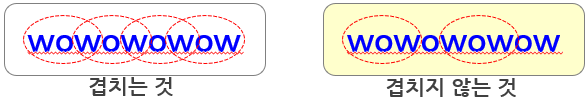

In [ ]:
# findall
import re

ret = re.findall(r'wow', 'wowowowow')
print(type(ret))
for t in ret:
    print(f"Matched : {t}")

<class 'list'>
Matched : wow
Matched : wow


In [ ]:
# finditer
ret = re.finditer(r'wow', 'wowowowow')
print(type(ret))
for t in ret:
    print(f"Matched : {t}")

<class 'callable_iterator'>
Matched : <_sre.SRE_Match object; span=(0, 3), match='wow'>
Matched : <_sre.SRE_Match object; span=(4, 7), match='wow'>


In [ ]:
# search
pattern = re.compile(r'[a-z]{2}')
ret1 = pattern.search('123abc123')
ret2 = pattern.search('abcXde')
if ret1 : print(f'Matched ret1 : {ret1.group()}')
if ret2 : print(f'Matched ret2 : {ret2.group()}')

Matched ret1 : ab
Matched ret2 : ab


In [ ]:
# match
pattern = re.compile(r'[a-z]{2}')
ret1 = pattern.match('123abc123')
ret2 = pattern.match('abcXde')
if ret1 : print(f'Matched ret1 : {ret1.group()}')
if ret2 : print(f'Matched ret2 : {ret2.group()}')

Matched ret2 : ab


In [ ]:
# fullmatch
pattern = re.compile(r'[a-z]{2}')
ret1 = pattern.fullmatch('abcd')
ret2 = pattern.fullmatch('ab')
if ret1 : print(f'Matched ret1 : {ret1.group()}')
if ret2 : print(f'Matched ret2 : {ret2.group()}')

Matched ret2 : ab


In [ ]:
# 숫자 1개 이상으로 이루어진 문자열 (숫자만으로 이루어진 문자열)
data = ('1', '12', '1234', '12ab34', '12 34')
for x in data :
    r = re.fullmatch(r'\d+', x)
    print(r)

<_sre.SRE_Match object; span=(0, 1), match='1'>
<_sre.SRE_Match object; span=(0, 2), match='12'>
<_sre.SRE_Match object; span=(0, 4), match='1234'>
None
None


### 3-02. 치환/분리함수
- re.sub(패턴, 치환문자열, 문자열) : 문자열에서 패턴과 매치하는 텍스트를 치환문자열로 치환함
- re.split(패턴, 문자열) : 문자열을 패턴 기준으로 분리함
   - 문자열 list로 반환, 패턴에 맞는 것이 없으면 문자열을 분리하지 않고 1개 item으로 취급함

In [ ]:
import re
# 연속된 알파벳 소문자 1개 이상을 X로 치환
ret = re.sub('[a-z]+', 'X',  'abc1de2fg3hij')
print(ret)

X1X2X3X


In [ ]:
# 숫자를 구분자로 하여 문자열 분리
ret = re.split(r'\d', 'abc1de2fg3hij')
print(ret)

['abc', 'de', 'fg', 'hij']


### 3-03. Match 객체의 메서드
- mc.group() : 매치되는 텍스트를 string으로 변환하여 반환
- mc.group(번호 또는 이름) : 그룹 번호에 해당하는 텍스트를 string으로 변환하여 반환
   - 그룹 번호는 1부터 시작하여 1씩 증가하는 정수
- mp.group(번호1, 번호 ...) : 여러 개의 그룹을 텍스트로 변환하여 tuple 반환
- mc.groups() : 매치되는 텍스트들을 string으로 변환하여 튜플 반환
- mc.start() : 매치된 텍스트의 시작 위치 반환
- mc.end() : 매치된 텍스트의 마지막 다음 위치 반환
- mc.span() : 매치된 텍스트의 (start, end) 에 해당되는 튜플 반환

In [ ]:
import re

pattern = re.compile(r'(?P<localcode>\(\d{3}\)) (\d{3})-(\d{4})')
ret = pattern.search('(031) 234-2345')
print(ret.group(1))
print(ret.group('localcode'))
print(ret.group(2))
print(ret.group(3))
print(ret.groups())
print(ret.group(2, 3))
print(ret.group(), ret.start(), ret.end(), ret.span())


### 3-04. compile()의 옵션
- re.compile(패턴문자열, 옵션)과 같이 사용함
- re.탐색함수(패턴, 문자열, 옵션)과 같이 사용함
   - 여러 개의 옵션을 동시 적용하기 위해서는 or 연산을 하는 ```|```를 사용함
- re.DOTALL, re.S : . 메타문자를 \n을 포함한 글자 1개를 표현할 수 있도록 함
- re.IGNORECASE, re.I : 영문 대/소문자를 구분하지 않고 매치 수행
- re.MULTILINE, re.M : ^ 및 $과 연관 있는 옵션으로 문자열이 '여러 줄'인 것을 허용
- re.VERBOSE, re.X : 이해 어려운 정규식에 주석 또는 라인단위로 구분하여 표시할 수 있도록 처리   

In [ ]:
import re

pt1 = re.compile(r'.*')
pt2 = re.compile(r'.*', re.DOTALL)
pt3 = re.compile(r'.*', re.S)
for pattern in (pt1, pt2, pt3) :
    ret = re.search(pattern, 'Good\nBetter')
    print(ret.group())
    print('-' * 10)
   
#ret = re.search(r'.*', 'Good\nBetter', re.DOTALL)
    

Good
----------
Good
Better
----------
Good
Better
----------


In [ ]:
pt1 = re.compile(r'abc')
pt2 = re.compile(r'abc', re.IGNORECASE)
pt3 = re.compile(r'abc', re.I)
for pt in pt1, pt2, pt3 :
    ret = re.findall(pt, 'abcABCAbC')
    print(ret)

['abc']
['abc', 'ABC', 'AbC']
['abc', 'ABC', 'AbC']


In [ ]:
msg = 'Good Morning!\nGood Afternoon!\nGood Evening!'
pt1 = re.compile(r'^G(.*)ing!$')
pt2 = re.compile(r'^G(.*)ing!$', re.MULTILINE)
pt3 = re.compile(r'^G(.*)ing!$', re.S)

ret = re.finditer(pt2, msg)
print(*ret, sep='\n')   # argumnet unpack
print("DONE!")

<_sre.SRE_Match object; span=(0, 13), match='Good Morning!'>
<_sre.SRE_Match object; span=(30, 43), match='Good Evening!'>
DONE!


In [ ]:
import re
phone1 = re.compile(r'\(\d{3}\)\s?\d{3}-\d{4}')
phone2 = re.compile(r'''(
    \(\d{3}\)    # area code
    \s?          # white space  (0 or 1)
    \d{3}        # first 3 digits
    -            # seperator
    \d{4}        # last 4 digits
)''', re.VERBOSE)
ret = re.search(phone2, 'Phone: (031) 234-2345')
print(ret.group())

(031) 234-2345


## 4.Quiz


In [ ]:
import re

def printMatch(pstr, data):
    print(pstr)
    for x in data :
        mc = re.search(pstr, x)
        maxLen = max(len(x) for x in data)
        if mc :
            print(f'{x:{maxLen}} : {mc.start()}~{mc.end()}에 {mc.group()}존재') 
        else:
            print(f'{x:{maxLen}} : 문자열에 {pstr}패턴이 존재하지 않음')

### 4-01. 양수 검색
- 0보다 큰 양수를 검색하는 패턴을 작성하라
   - 1, 2, 3, ... 
- 단, 0, 01, 1a 등은 검색 대상으로 삼지 않는다
  - 0부터 시작된 숫자 또는 숫자 이외의 문자와 섞여 있으면 검색 대상이 아님
- 주어진 dataList를 패턴 확인용 데이터로 사용한다
- printMatch 함수를 사용하여 패턴의 동작을 확인한다

In [ ]:
dataList = ('1', '12', '321', '100', '0', '01', '001', '1a')
printMatch(r'^[1-9]\d*$', dataList)

^[1-9]\d*$
1   : 0~1에 1존재
12  : 0~2에 12존재
321 : 0~3에 321존재
100 : 0~3에 100존재
0   : 문자열에 ^[1-9]\d*$패턴이 존재하지 않음
01  : 문자열에 ^[1-9]\d*$패턴이 존재하지 않음
001 : 문자열에 ^[1-9]\d*$패턴이 존재하지 않음
1a  : 문자열에 ^[1-9]\d*$패턴이 존재하지 않음


### 4-02. 날짜 형식 찾기
- 규칙
   - 년도는 숫자 4글자이면서 19 또는 20으로 시작함
   - 월을 01 ~ 12로 표시되고, 일은 01~31로 표시됨
   - 윤달 및 28, 29, 30으로 끝나는 달을 별도 확인하지 않음
   - '-'를 사용하여 년, 월, 일을 구분함
   - 예) 1990-09-12, 2021-12-02



In [ ]:
01 02 03 04 ...09 10 11 12 ... 19 20 21 22 ....29 30 31

In [ ]:
data = ('1990-09-12', '2020-12-31', '2099-10-32', '89-01-08') 
printMatch(r'^(19|20)\d{2}-(0[1-9]|1[0-2])-(0[1-9]|[12][0-9]|3[01])$',  data)      

^(19|20)\d{2}-(0[1-9]|1[0-2])-(0[1-9]|[12][0-9]|3[01])$
1990-09-12 : 0~10에 1990-09-12존재
2020-12-31 : 0~10에 2020-12-31존재
2099-10-32 : 문자열에 ^(19|20)\d{2}-(0[1-9]|1[0-2])-(0[1-9]|[12][0-9]|3[01])$패턴이 존재하지 않음
89-01-08   : 문자열에 ^(19|20)\d{2}-(0[1-9]|1[0-2])-(0[1-9]|[12][0-9]|3[01])$패턴이 존재하지 않음


### 4-03. 메일 주소 찾기
- 규칙
   - @ 기호 앞은 '.'을 포함한 워드문자로 구성된 문자열이 올 수 있다 ('.'이 있을 수도 있고 없을수도 있음)
   - 단, '.'이 단독으로 존재하거나, '.'이 첫글자여서는 안된다.
   - @ 기호
   - @ 기호 뒤는 워드 문자가 1개 이상 온다
   - 위의 1개 이상의 워드 문자 뒤로 '.'으로 시작하고 워드문자 1개 이상으로 구성된 문자열이 1회 또는 2회 반복되어 사용된다 ('.'이 1, 2회 사용되어야 함)

In [ ]:
import re

data = ('abc@naver.com', 'kbs.kim@gmail.or.kr', 'all.for.you.11@shopping.net', '.@naver.com', 'abcdef@abc', '3#@abc.co.kr')
printMatch(r'^\w+[\.\w]*@\w+(\.\w+){1,2}$', data)

^\w+[\.\w]*@\w+(\.\w+){1,2}$
abc@naver.com               : 0~13에 abc@naver.com존재
kbs.kim@gmail.or.kr         : 0~19에 kbs.kim@gmail.or.kr존재
all.for.you.11@shopping.net : 0~27에 all.for.you.11@shopping.net존재
.@naver.com                 : 문자열에 ^\w+[\.\w]*@\w+(\.\w+){1,2}$패턴이 존재하지 않음
abcdef@abc                  : 문자열에 ^\w+[\.\w]*@\w+(\.\w+){1,2}$패턴이 존재하지 않음
3#@abc.co.kr                : 문자열에 ^\w+[\.\w]*@\w+(\.\w+){1,2}$패턴이 존재하지 않음


### 4-04. 한글, 콤마(,) 및 소수 부분 제거
- 금액에 함께 표기된 한글, 콤마(,) 및 소수 부분을 제거한다.
- 다음의 입력과 출력예시를 참조한다
> 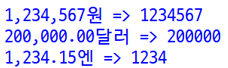


In [ ]:
import re

def removeThings(data):
    return re.sub(r'[가-힣]+|,|\.\d+', '', data)

datalist = ('1,234,567원', '200,000.00달러', '1,234.15엔')  
for x in datalist:
  r = removeThings(x)
  print(f'{x} => {r}')

1,234,567원 => 1234567
200,000.00달러 => 200000
1,234.15엔 => 1234


### 4-05. 주민등록번호 유효성 검사 및 암호 처리
- 주민등록번호에 대한 다음의 처리를 수행하는 코드를 작성하라
- 유효성 검사를 수행한다 (정밀한 검증이 아닌 형태에 대한 검증)
    - 숫자6자-숫자7자로 구성
    - 앞의 6글자 중 3,4번째는 01-12, 5,6번째는 01-31의 숫자, 뒤의 7글자 중 1번째는 1~4 중 한가지 이어야 함
- 유효한 주민등록번호인 경우 뒤의 7자를 *로 치환하여 출력하도록 한다
- 유효하지 않은 주민등록번호인 경우 ‘XX is NOT an id’를 출력 한다
- 다음의 입력과 출력예시를 참조한다
> 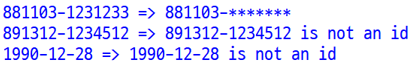


In [ ]:
import re

def idcheck(data):
    r = re.search(r'^\d{2}(0[1-9]|1[0-2])(0[1-9]|[12][0-9]|3[01])-[1-4]\d{6}$', data)
    if r:
        return re.sub('\d{7}', '*'*7, r.group())
    else:
        return f'{data} is not an id'


datalist = ('881103-1231233', '891312-1234512', '1990-12-28')
for x in datalist:
    r = idcheck(x)
    print(f'{x} => {r}')

881103-1231233 => 881103-*******
891312-1234512 => 891312-1234512 is not an id
1990-12-28 => 1990-12-28 is not an id
